In [111]:
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [124]:
def JS_estimator(x):
    """
    Return the estimation given by J-S estimator 
    """
    p = x.shape[0]
    norm = np.dot(x, np.transpose(x))
    return (1 - (p - 2) / norm) * x

In [125]:
def natural_estimator(x):
    """
    Return the estimation given by natural esitmator
    """
    return x

In [140]:
def sample_MSE(mu, estimator):
    p = mu.shape[0]
    sample_num = 1000000
    samples = np.zeros((p, sample_num))
    dis = np.zeros(sample_num)

    # take samples from normal distribution
    for i in range(p):
        sample_i = np.random.normal(loc=mu[i], scale=1.0, size=sample_num)
        samples[i,:] = sample_i
    
    # Compute (f(X) - \mu)^2
    dis = np.linalg.norm(np.apply_along_axis(estimator, 1, samples) - mu[:, None], axis = 0) ** 2
    """
    for i in range(sample_num):
        dis_i = estimator(samples[:,i]) - mu
        dis[i] = np.dot(dis_i, np.transpose(dis_i))
    """
    return np.mean(dis)
        
mu = np.array([0.1, 0.1, 0.1])
print(sample_MSE(mu, JS_estimator))
print(sample_MSE(mu, natural_estimator))

0.029707089792785926
2.997158679069538


In [148]:
# Sample different mu
mu_sample_num = 1000
mu_list = np.random.uniform(0, 3, size=(mu_sample_num, 3))
sorted_list = sorted(mu_list, key=lambda x: np.dot(x, np.transpose(x)))

In [149]:
distance = np.zeros(mu_sample_num)
JS_MSE = np.zeros(mu_sample_num)
ML_MSE = np.zeros(mu_sample_num)

for i in trange(mu_sample_num):
    mu = sorted_list[i]
    distance[i] = np.dot(mu, np.transpose(mu))
    JS_MSE[i] = sample_MSE(mu, JS_estimator)
    ML_MSE[i] = sample_MSE(mu, natural_estimator)


100%|██████████| 1000/1000 [02:12<00:00,  7.56it/s]


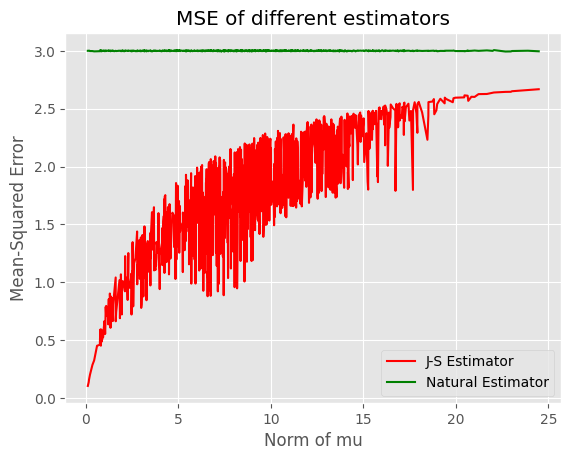

In [153]:
plt.plot(distance, JS_MSE, color = 'r', label="J-S Estimator")
plt.plot(distance, ML_MSE, color = 'g', label="Natural Estimator")
plt.xlabel("Norm of mu")
plt.ylabel("Mean-Squared Error")
plt.legend(loc = "best")
plt.title("MSE of different estimators")
plt.savefig("Mean-Squared Error Sample")